## Wordnet Similarity

### Part - 1
   
    1. Find the top 5 occuring words(ignoring the stop words) and then find the words most similar to them. Use the extract given below.
    
    2. For any given word visualize how two words are similar

~~~~
The Supreme Court ruled last week in the case of Fane Lozman vs the City of Riviera Beach, Florida. They decided that Lozman’s 60-foot, two-story, motorless, rudderless floating home was not a boat or a vessel, and hence should not have been seized under maritime law and destroyed by the city.

With the line between house and boat a little bit clearer, reader Steve asked us to clarify something else: “What defines a boat, versus a ship?”

One of the quickest ways to reveal yourself as a landlubber is to refer to a ship as a boat, but there’s no absolute distinction between the two, and even experienced mariners rely on local custom and usage to differentiate them. 

Back in the Age of Sail, a ship was pretty well defined as a vessel with three or more square rigged masts. As different methods of power generation replaced wind and sail, the ships of old became more specifically known as “sailing ships,” and the usage of ship broadened to cover a wide, ill-defined variety of vessels. 

One thing that sets a ship apart from a boat is size. According the U.S. Naval Institute, a boat, generally speaking, is small enough to be carried aboard a larger vessel, and a vessel large enough to carry a smaller one is a ship. Or, as Steve says his Navy Lieutenant father put it to him, “You can put a boat on a ship, but you can’t put a ship on a boat.”

Now, this Naval convention is a good rule of thumb most of the time, but there are a few exceptions, among both naval and civilian vessels. Some yachts, ferries, tug boats, fishing boats, police boats, etc. can carry small lifeboats or dinghies, but they usually don’t graduate to ship status because of that. On the other hand, a large container ship or the USS Cole can be carried aboard an even bigger ship without getting demoted to a boat. 

The U.S. Navy seems to want to have it both ways with their submarines. One component of each vessel’s official name is USS—that is, United States Ship—but seamen, the Naval Institute says, usually refer to submarines in general as boats, regardless of size. 
~~~~


In [34]:
text="""The Supreme Court ruled last week in the case of Fane Lozman vs the City of Riviera Beach, Florida. They decided that Lozman’s 60-foot, two-story, motorless, rudderless floating home was not a boat or a vessel, and hence should not have been seized under maritime law and destroyed by the city.

With the line between house and boat a little bit clearer, reader Steve asked us to clarify something else: “What defines a boat, versus a ship?”

One of the quickest ways to reveal yourself as a landlubber is to refer to a ship as a boat, but there’s no absolute distinction between the two, and even experienced mariners rely on local custom and usage to differentiate them. 

Back in the Age of Sail, a ship was pretty well defined as a vessel with three or more square rigged masts. As different methods of power generation replaced wind and sail, the ships of old became more specifically known as “sailing ships,” and the usage of ship broadened to cover a wide, ill-defined variety of vessels. 

One thing that sets a ship apart from a boat is size. According the U.S. Naval Institute, a boat, generally speaking, is small enough to be carried aboard a larger vessel, and a vessel large enough to carry a smaller one is a ship. Or, as Steve says his Navy Lieutenant father put it to him, “You can put a boat on a ship, but you can’t put a ship on a boat.”

Now, this Naval convention is a good rule of thumb most of the time, but there are a few exceptions, among both naval and civilian vessels. Some yachts, ferries, tug boats, fishing boats, police boats, etc. can carry small lifeboats or dinghies, but they usually don’t graduate to ship status because of that. On the other hand, a large container ship or the USS Cole can be carried aboard an even bigger ship without getting demoted to a boat. 

The U.S. Navy seems to want to have it both ways with their submarines. One component of each vessel’s official name is USS—that is, United States Ship—but seamen, the Naval Institute says, usually refer to submarines in general as boats, regardless of size."""

# Part 1 #

In [35]:
import nltk
import re
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [36]:
text=re.sub('[^A-Za-z0-9\s]*','',text)
stop_words = stopwords.words("english")
all_words = word_tokenize(text)

In [37]:
not_stopwords=[]
for i in all_words:
    if i.lower() not in stop_words:
        not_stopwords.append(i.lower())    

In [38]:
freq_words=nltk.FreqDist(not_stopwords)

In [39]:
mostcomm_words = freq_words.most_common(5)
mostcomm_words

[('ship', 11), ('boat', 9), ('vessel', 4), ('one', 4), ('naval', 4)]

In [40]:
lemmatizer=WordNetLemmatizer()
for i in range(len(not_stopwords)):
    not_stopwords[i] = lemmatizer.lemmatize(not_stopwords[i])

In [43]:
# A list of Most Common Words
most_common_words = list(list(zip(*mostcomm_words))[0])

In [44]:
# Synsets of Most_Common_Words
most_occuring_words = [wn.synsets(word)[0] for word in most_common_words]

In [45]:
# Possible words in article, discarding the frequently occuring ones
possible_words_in_article = [word for word in not_stopwords if word not in most_common_words]

In [46]:
# Possible Synsets in the article
possible_synsets_in_article = [wn.synsets(word)[0] for word in possible_words_in_article if len(wn.synsets(word)) > 0]

In [47]:
# Permutations of possible_words_in_article and most_occuring_words
import itertools
possible_combinations = list(itertools.product(most_occuring_words, possible_synsets_in_article))

In [48]:
similar_words = {}
for synsets in possible_combinations:
    word_similarity = synsets[0].wup_similarity(synsets[1])
    if word_similarity == None:
        word_similarity = 0
    if synsets[0] in similar_words:
        if similar_words[synsets[0]][1] < word_similarity:
            similar_words[synsets[0]] = (synsets[1], word_similarity)
    else:
        similar_words[synsets[0]] = (synsets[1], word_similarity)

In [49]:
similar_words

{Synset('boat.n.01'): (Synset('ferry.n.01'), 0.9565217391304348),
 Synset('naval.a.01'): (Synset('supreme.s.01'), 0),
 Synset('one.n.01'): (Synset('two.n.01'), 0.875),
 Synset('ship.n.01'): (Synset('yacht.n.01'), 0.9090909090909091),
 Synset('vessel.n.01'): (Synset('back.n.01'), 0.7142857142857143)}

In [50]:
mcw=list(list(zip(*mostcomm_words))[0])

In [51]:
not_stopwords_not_mcw=[words for words in not_stopwords if words not in mcw]

In [52]:
wd={}
mx=0
for i in mcw:
    mx=0
    w1=wn.synsets(i)[0]
    for j in not_stopwords_not_mcw:
        if len(wn.synsets(j))>0:
            w2=wn.synsets(j)[0]
            wordsm=w1.wup_similarity(w2)
            if wordsm==None:
                wordsm=0
            if i in wd:
                if wd[i][1]<wordsm:
                    wd[i]=[j,wordsm] 
            else:
                wd[i]=[j,mx]
                

In [53]:
wd

{'boat': ['ferry', 0.9565217391304348],
 'naval': ['supreme', 0],
 'one': ['two', 0.875],
 'ship': ['yacht', 0.9090909090909091],
 'vessel': ['back', 0.7142857142857143]}

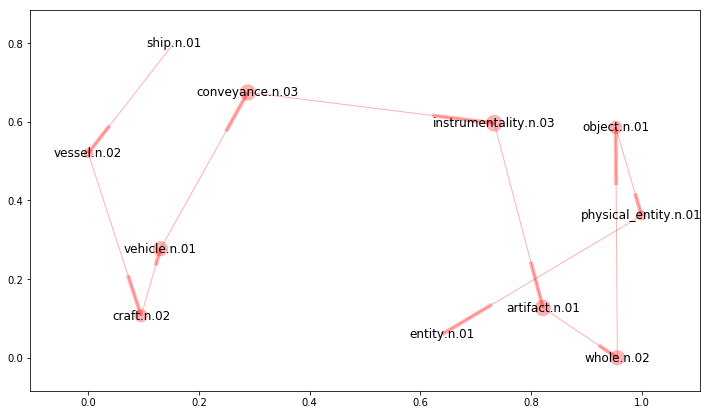

In [54]:
from nltk.corpus import wordnet as wn
import networkx as nx
import matplotlib.pyplot as plt

def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()

    def recurse(s):
        if not s in seen:
            seen.add(s)
            graph.add_node(s.name())
            for s1 in fn(s):
                graph.add_node(s1.name())
                graph.add_edge(s.name(), s1.name())
                recurse(s1)

    recurse(synset)
    return graph


ship = wn.synsets('ship')[0]
G = closure_graph(ship,
                      lambda s: s.hypernyms())
index = nx.betweenness_centrality(G)
plt.rc('figure', figsize=(12, 7))
node_size = [index[n]*1000 for n in G]
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=node_size, edge_color='r', alpha=.3, linewidths=0)
plt.show()

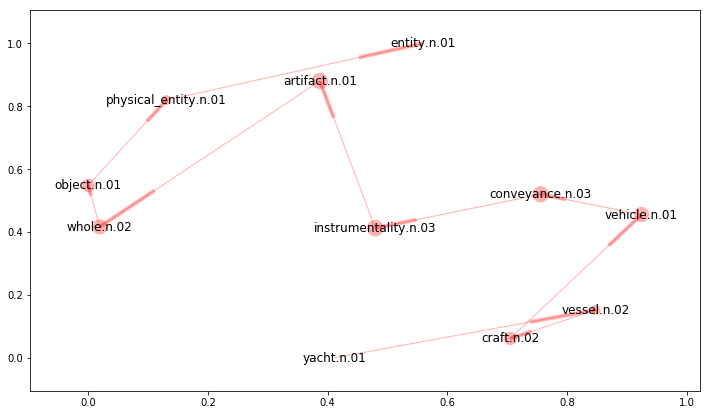

In [55]:
from nltk.corpus import wordnet as wn
import networkx as nx
import matplotlib.pyplot as plt

def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()

    def recurse(s):
        if not s in seen:
            seen.add(s)
            graph.add_node(s.name())
            for s1 in fn(s):
                graph.add_node(s1.name())
                graph.add_edge(s.name(), s1.name())
                recurse(s1)

    recurse(synset)
    return graph


yacht = wn.synsets('yacht')[0]
G = closure_graph(yacht,
                      lambda s: s.hypernyms())
index = nx.betweenness_centrality(G)
plt.rc('figure', figsize=(12, 7))
node_size = [index[n]*1000 for n in G]
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=node_size, edge_color='r', alpha=.3, linewidths=0)
plt.show()